In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [2]:
df=pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [8]:
df=df.rename(columns={
    'Annual Income (k$)':'annual_income' ,
    'Spending Score (1-100)' : 'spend_score'})
    

In [9]:
df.head()

,CustomerID,Genre,Age,annual_income,spend_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
x=df[['annual_income' ,'spend_score']]

In [20]:
#Scaling beacause it is distance based algorithm
scaler=StandardScaler()
xscaled=scaler.fit_transform(x)

In [21]:
xscaled=pd.DataFrame(xscaled, columns=x.columns)
xscaled.head()

,annual_income,spend_score
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


In [23]:
km=KMeans(n_clusters = 4)
km.fit(xscaled)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [24]:
km.labels_ # data point kun cluster ma paryo herney

array([3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0])

In [26]:
km.cluster_centers_

array([[ 0.99158305,  1.23950275],
       [ 1.00919971, -1.22553537],
       [-0.46948398,  0.2437994 ],
       [-1.30751869, -1.13696536]])

In [31]:
centers=pd.DataFrame(km.cluster_centers_ , columns=['p1' ,'p2'])
centers.head()

,p1,p2
0,0.991583,1.239503
1,1.009200,-1.225535
2,-0.469484,0.243799
3,-1.307519,-1.136965


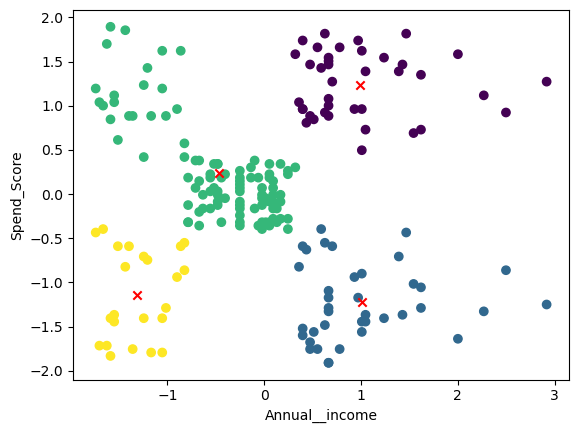

In [33]:
plt.scatter(xscaled.annual_income, xscaled.spend_score, c=km.labels_) 
plt.scatter(centers.p1 , centers.p2, color='red' , marker='x')
plt.xlabel('Annual__income')
plt.ylabel('Spend_Score')
plt.show()

In [ ]:
#No of optimal clusters
WCSS(within cluster sum of  squares) INERTIA

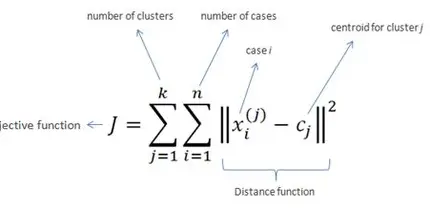

In [39]:
 km.inertia_

108.92131661364357

In [ ]:
k=1 , k=2 , k=3,  k=4 .....
iner

In [ ]:

wcss=[]
for i in range(1, 11):
    kmodel=KMeans(n_clusters=i)
    kmodel.fit(xscaled)


    inertia=kmodel.inertia_
    wcss.append(inertia)

In [36]:
wcss

[400.0,
 269.29934286898697,
 157.70400815035947,
 108.92131661364357,
 65.57885579985047,
 55.10377812115057,
 50.09958681800949,
 37.183497459697236,
 35.012957142779115,
 31.603036464253115]

In [40]:
# ELbow method  is used for selecting number of optimal clusters

In [41]:
#line  plot

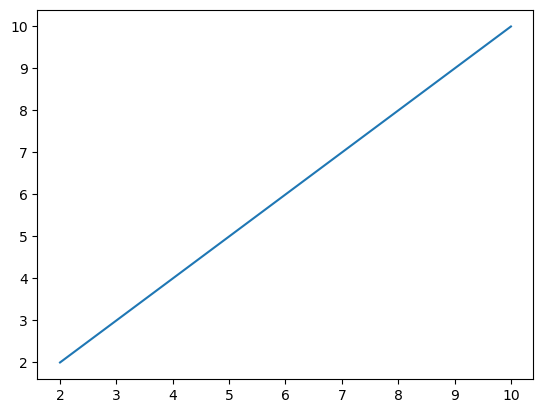

In [42]:
plt.plot(range(2,11), range(2,11))   # plt.plot(x-axis, y-axis)
plt.show()

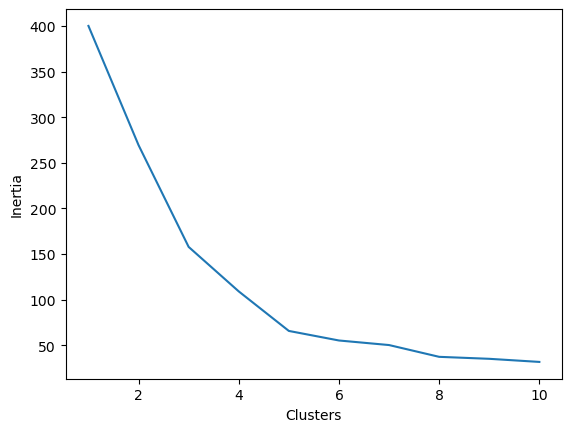

In [44]:
plt.plot(range(1,11) , wcss)
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.show()

In [45]:
# jaa nirr sharp point dhekhinch tae nir ko value = no of clusters
# angle jaa kam hunch

In [ ]:
in above figure sharp turn is in 5 so that no_of_clusters=5
